# Lab-Tril- Crusterizacao

## PARTE 1 | PRÉ-PROCESSAMENTO

## 1 - Carregando bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
variaveis_df = pd.read_csv("./dados/variaveis_com_Js.csv")
#variaveis_df = variaveis_df.set_index("Unnamed: 0").rename_axis(index="")

In [5]:
variaveis_df.head()

,RQI,pressao_inversa,pressao,porosidade,permeabilidade,distancia,J1,J2,J3,J4,J5,J6,J1_normalizado,J2_normalizado,J3_normalizado,J4_normalizado,J5_normalizado,J6_normalizado
,,,,,,,,,,,,,,,,,,
1420,0.069273,4547.7,4604.8,0.096270,0.46856,9.8232,0.069273,318.989706,315.034201,728.810754,719.773425,0.103061,0.035941,0.035736,0.036148,0.008552,0.008658,0.000075
1421,0.087730,4552.3,4600.6,0.071361,0.55706,9.5777,0.087730,403.612575,399.375196,911.937379,902.363285,0.089818,0.045518,0.045216,0.045826,0.010701,0.010854,0.000065
1422,0.072516,4557.2,4596.2,0.087854,0.46856,9.3245,0.072516,333.296461,330.468350,744.132792,737.818624,0.091907,0.037624,0.037338,0.037919,0.008732,0.008875,0.000067
1423,0.072662,4562.4,4591.5,0.087500,0.46856,9.0597,0.072662,333.628099,331.513632,735.261618,730.601679,0.090355,0.037700,0.037376,0.038039,0.008628,0.008788,0.000065
1424,0.116588,4567.9,4586.6,0.087966,12.12700,8.7957,0.116588,534.744664,532.564460,1162.675519,1157.935181,2.319425,0.060490,0.059906,0.061109,0.013644,0.013929,0.001680


## PARTE 2 | KDE

## 2.1 - Aplicando Kernel Density Estimation

### Vamos aplicar KDE para cada uma das funções qualificadoras de J

In [7]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
#from matplotlib.pyplot import plotpip 

### Encontrando bandwidth 

por validação cruzada (tecnica para generalização)

In [6]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [9]:
X1 = variaveis_df["J1_normalizado"].values[::].reshape(-1, 1) #retorna os valores do df com novo formato array

In [ ]:
bandwidths = 10 ** np.linspace(0.01, 0.05) #são as medidas de bandwidth que escolhemos para testar
grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidths},cv=LeaveOneOut())
#GridSerachCV realiza avaliacao cruzada, obtendo precisao/perda para cada combinacao de hiperparametros
#sendo os hiperparmetros, parametros do modelo que serão definidos antes do treino

grid.fit(X1) #adaptando o modelo

#bandwidth = 1.059*np.std(X1)*len(X1)**(-1/5) #calculo do bandwidth

#esse metodo usa bastante memoria, e pode dar um erro:Unable to allocate 291. KiB for an array with shape (74399,) and data type int32
#Como utilizar sem gastar memoria desnecessariamente? 

In [ ]:
grid.best_params_ #retorna o bandwidth "otimo"

In [ ]:
#bandwidth=0.01 padrão

In [10]:
min_i = 0
max_i1 = variaveis_df["J1_normalizado"].shape[0]#pega a dimensao da coluna J1
aux1 = max_i1 - min_i


kde_J1= KernelDensity(bandwidth=0.01).fit(X1) #por default: gaussian, bandwidth: 1.0
s1 = np.linspace(0, 1.0, aux1) #retorna os pontos em uma distancia equidistante
log1 = kde_J1.score_samples(s1.reshape(-1,1)) #calcula a probabilidade logarítmica de cada amostra sob o modelo

print("Numero de registros avaliados: ", aux1)

Numero de registros avaliados:  74400


In [9]:
import scipy.integrate as integrate
integrate.trapezoid(np.exp(log1),s1)

#INT = integrate.trapezoid(np.exp(e),s)
#np.round(INT,4)

0.9989704641411555

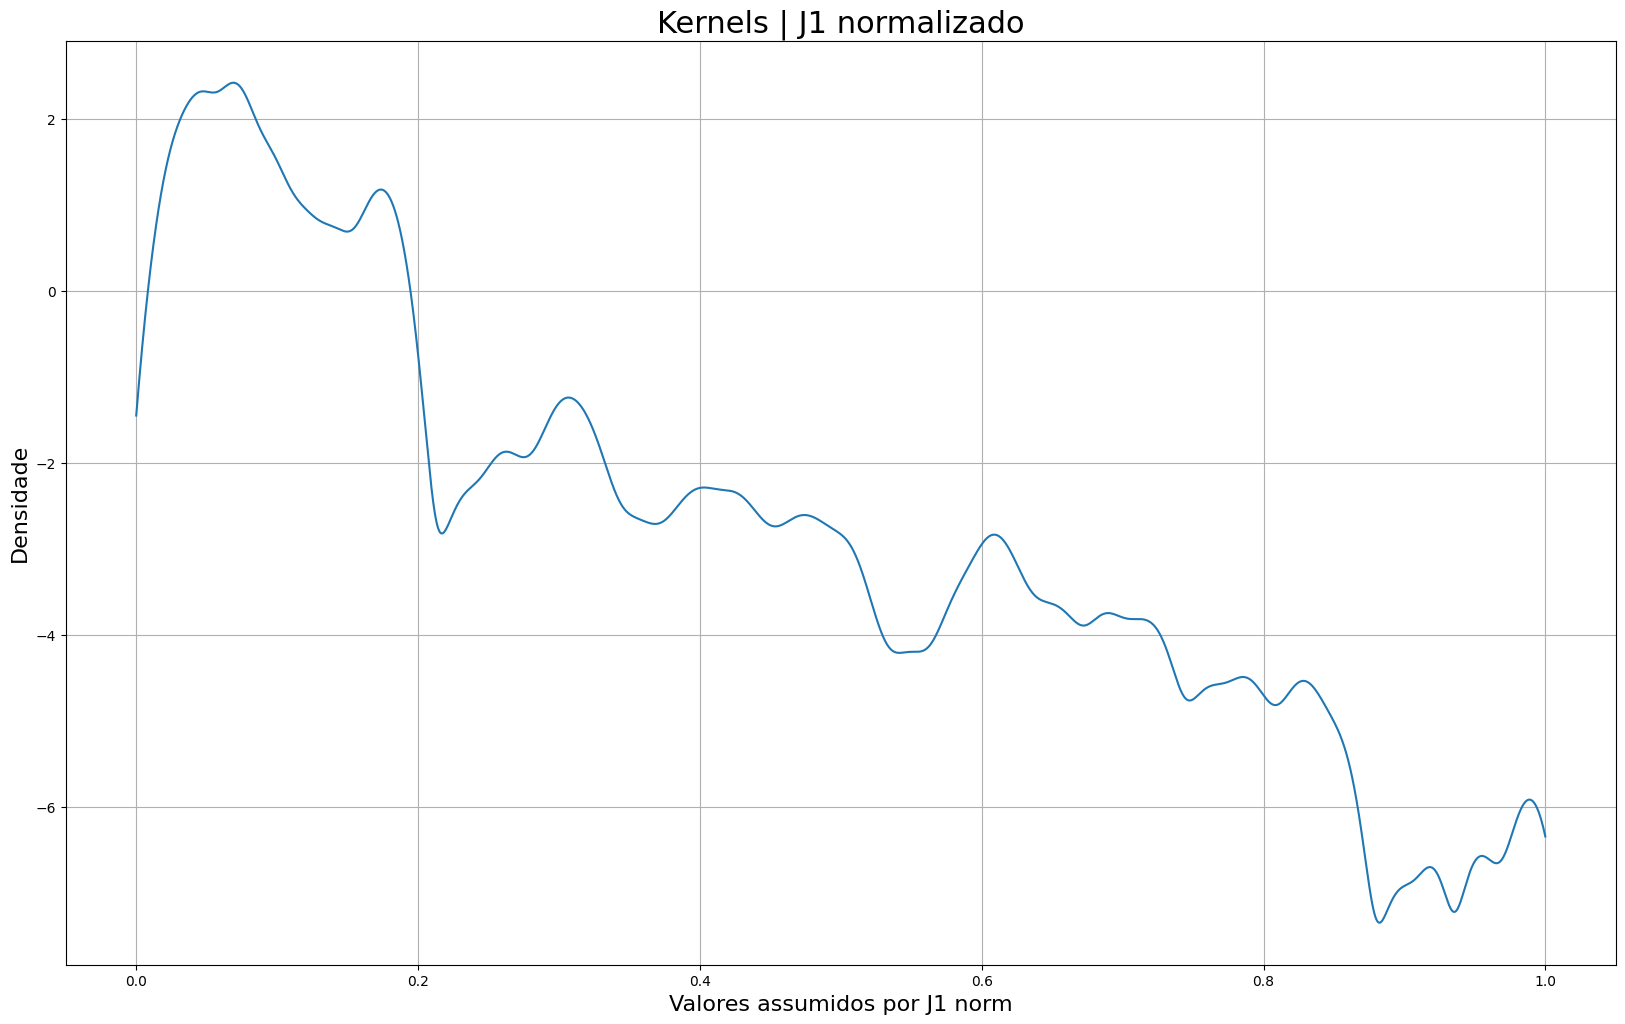

In [10]:
#Respectivo a J1

#plt.fill_between(s1, np.exp(log1), alpha=0.5) #preenche o espaço entre linhas (não funcionou)
plt.figure(figsize=(20, 12))
plt.title("Kernels | J1 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Valores assumidos por J1 norm", fontsize=16)
plt.grid(True)

plt.plot(s1, log1)
#plt.plot(s1,np.exp(e1)) aplicando exponencial

In [ ]:
# area is equal 1?
integrate.trapezoid(np.exp(log1),s1)

In [ ]:
#Respectivo a J1



In [16]:
#plt.plot(s1, e1) #log da verossimilhança (valores de maioria negativos)
#plt.plot(s1,np.exp(e1)) #valores positivos
e1 = kde_J1.score_samples(X1)
#plt.plot(s1,np.exp(e1)/max(np.exp(e1)))

In [ ]:
len(s1)

74400

In [ ]:
np.trapz(np.exp(e1))

536394.2118722022

Numero de registros avaliados:  74400


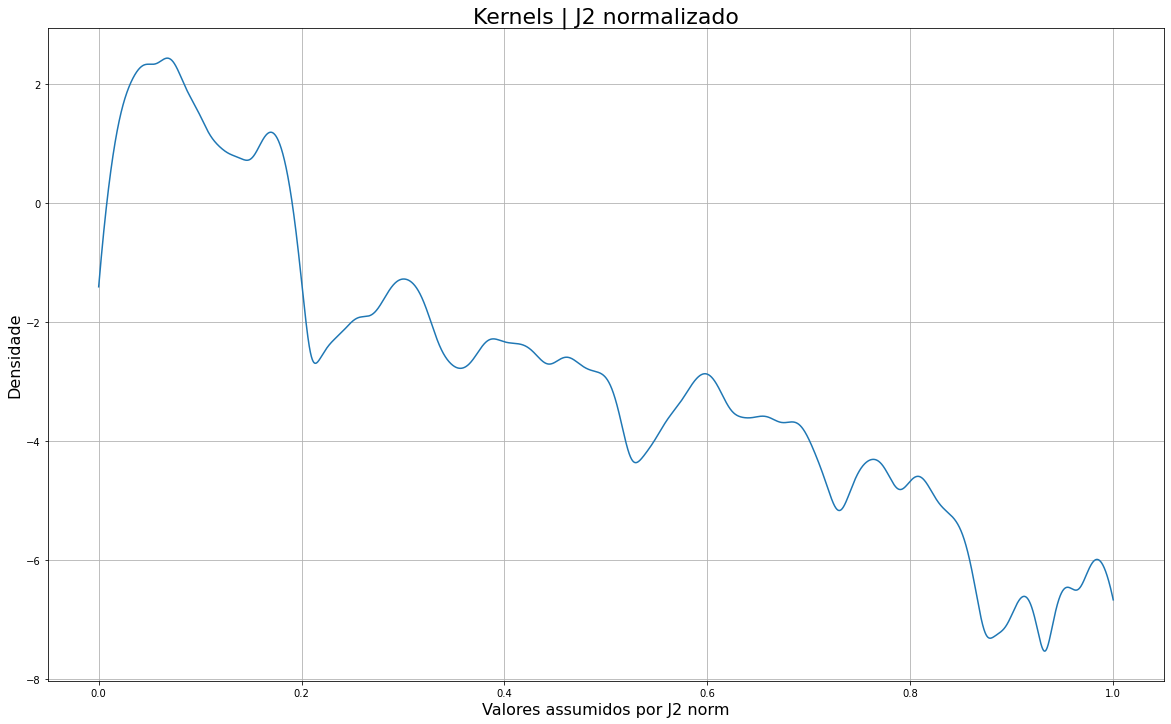

In [ ]:
#Respectivo a J2

min_i = 0
max_i2 = variaveis_df["J2_normalizado"].shape[0]

aux2 = max_i2 - min_i
print("Numero de registros avaliados: ", aux2)
X2 = variaveis_df["J2_normalizado"].values[::].reshape(-1, 1)
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X2)
s2 = np.linspace(0, 1.0, aux2)
e2 = kde2.score_samples(s2.reshape(-1,1))

plt.figure(figsize=(20, 12))
plt.title("Kernels | J2 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Valores assumidos por J2 norm", fontsize=16)
plt.grid(True)

plt.plot(s2, e2)

Numero de registros avaliados:  74400


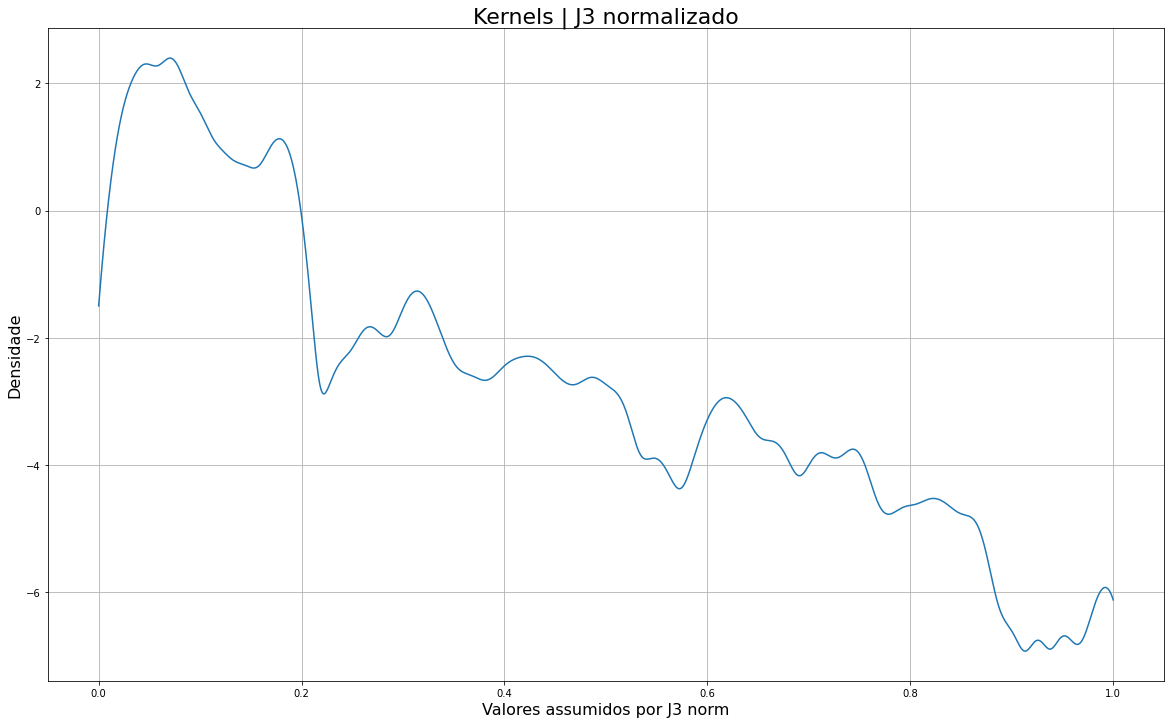

In [ ]:
#Respectivo a J3

min_i = 0
max_i3 = variaveis_df["J3_normalizado"].shape[0]

aux3 = max_i3 - min_i
print("Numero de registros avaliados: ", aux3)
X3 = variaveis_df["J3_normalizado"].values[::].reshape(-1, 1)
kde3 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X3)
s3 = np.linspace(0, 1.0, aux3)
e3 = kde3.score_samples(s3.reshape(-1,1))

plt.figure(figsize=(20, 12))
plt.title("Kernels | J3 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Valores assumidos por J3 norm", fontsize=16)
plt.grid(True)

plt.plot(s3, e3)

Numero de registros avaliados:  74400


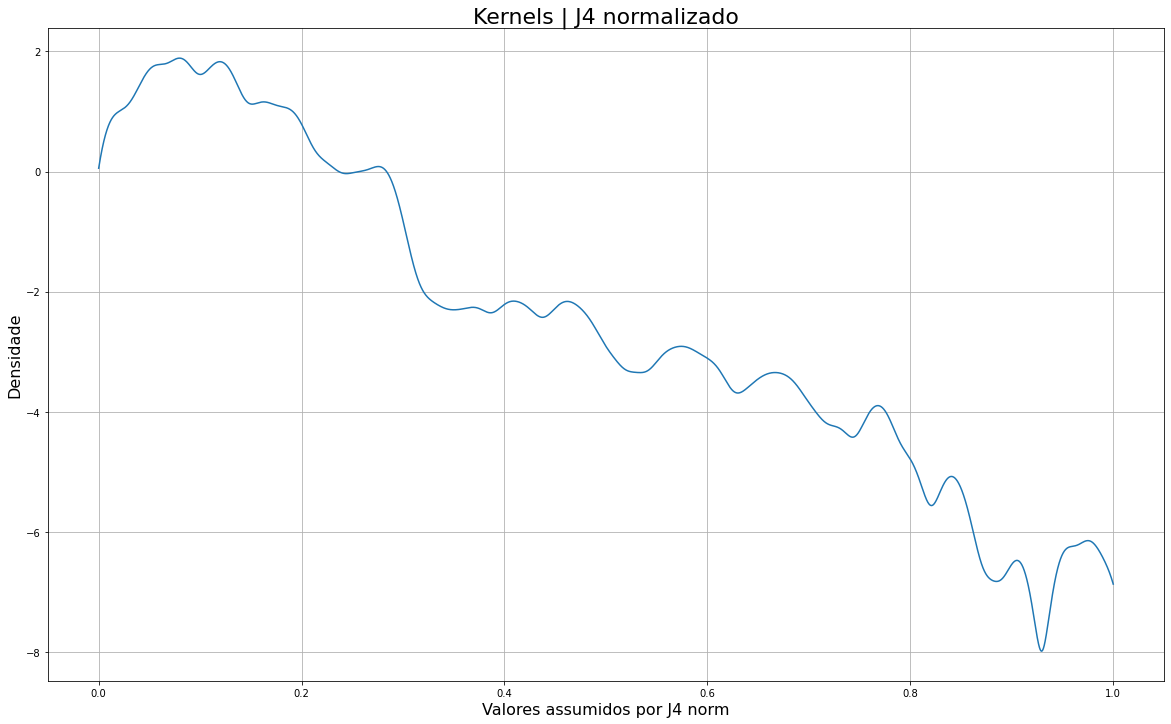

In [ ]:
#Respectivo a J4

min_i = 0
max_i4 = variaveis_df["J4_normalizado"].shape[0]

aux4 = max_i4 - min_i
print("Numero de registros avaliados: ", aux4)
X4 = variaveis_df["J4_normalizado"].values[::].reshape(-1, 1)
kde4 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X4)
s4 = np.linspace(0, 1.0, aux4)
e4 = kde4.score_samples(s4.reshape(-1,1))

plt.figure(figsize=(20, 12))
plt.title("Kernels | J4 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Valores assumidos por J4 norm", fontsize=16)
plt.grid(True)

plt.plot(s4, e4)

Numero de registros avaliados:  74400


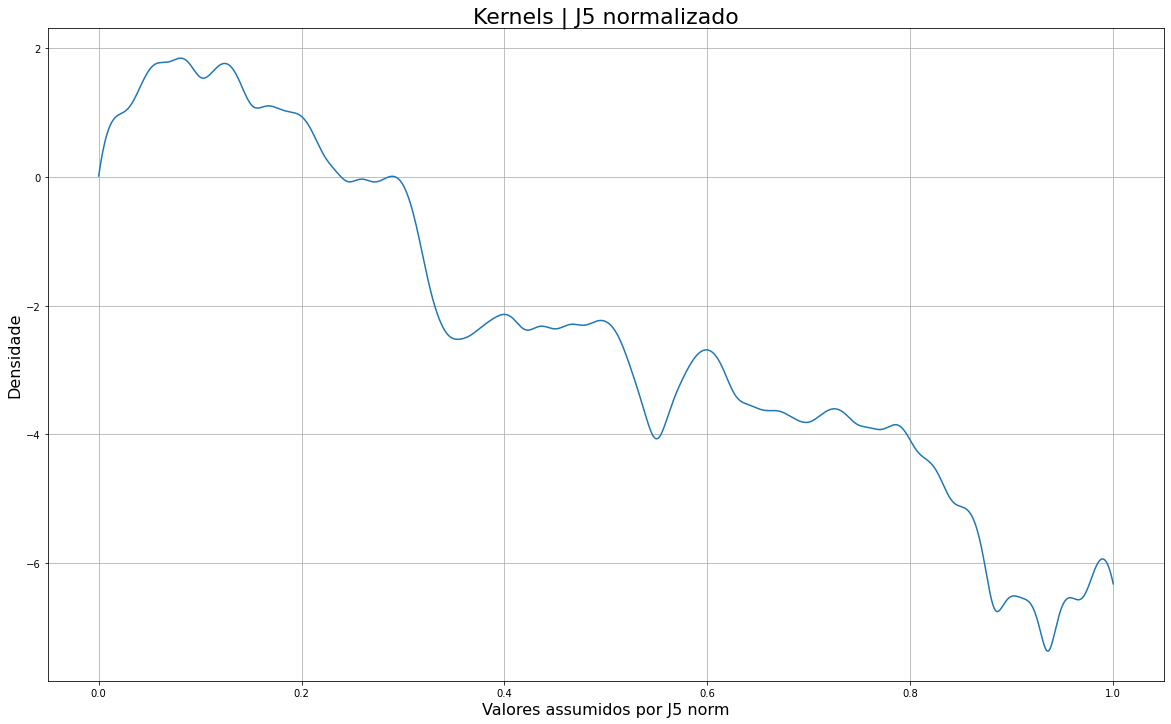

In [ ]:
#Respectivo a J5

min_i = 0
max_i5 = variaveis_df["J5_normalizado"].shape[0]

aux5 = max_i5 - min_i
print("Numero de registros avaliados: ", aux5)
X5 = variaveis_df["J5_normalizado"].values[::].reshape(-1, 1)
kde5 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X5)
s5 = np.linspace(0, 1.0, aux5)
e5 = kde5.score_samples(s5.reshape(-1,1))

plt.figure(figsize=(20, 12))
plt.title("Kernels | J5 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Valores assumidos por J5 norm", fontsize=16)
plt.grid(True)

plt.plot(s5, e5)

Numero de registros avaliados:  74400


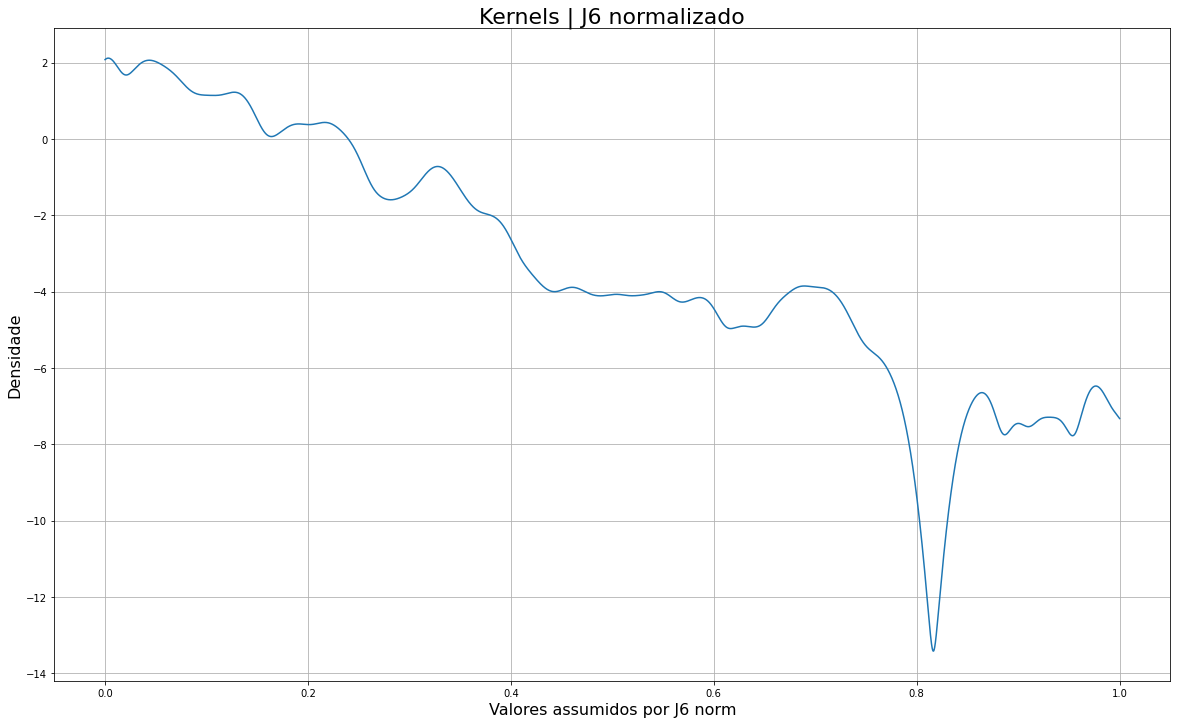

In [ ]:
#Respectivo a J6

min_i = 0
max_i6 = variaveis_df["J6_normalizado"].shape[0]

aux6 = max_i6 - min_i
print("Numero de registros avaliados: ", aux6)
X6 = variaveis_df["J6_normalizado"].values[::].reshape(-1, 1)
kde6 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X6)
s6 = np.linspace(0, 1.0, aux6)
e6 = kde6.score_samples(s6.reshape(-1,1))

plt.figure(figsize=(20, 12))
plt.title("Kernels | J6 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Valores assumidos por J6 norm", fontsize=16)
plt.grid(True)

plt.plot(s6, e6)

## 2.2 - Encontrando os picos do KDE para os J's normalizados

In [3]:
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

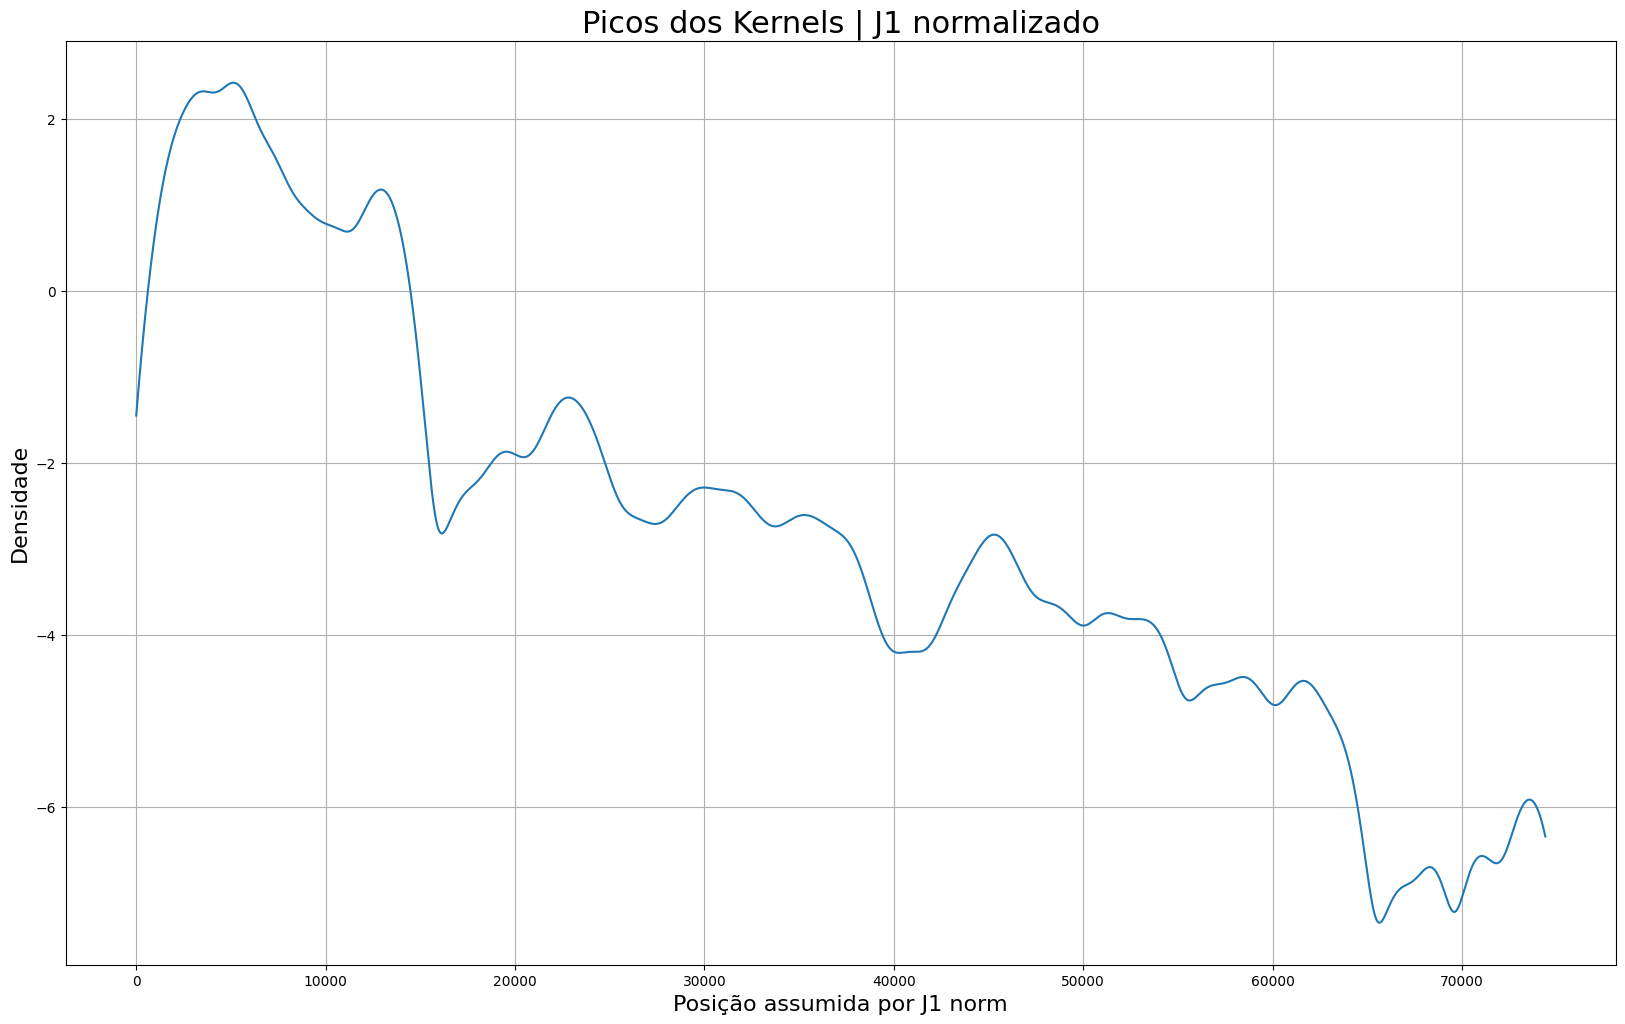

In [17]:
x1 = log1
peaks = find_peaks(x1, height=min(e1))

plt.figure(figsize=(20, 12))
plt.title("Picos dos Kernels | J1 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J1 norm", fontsize=16)
plt.grid(True)
plt.plot(x1)
plt.plot(peaks, x1[peaks], "o")
plt.show()

print(peaks)

In [18]:
X = sorted(variaveis_df["J1_normalizado"])

minimo = min(X)
classes = [minimo]
for i in range(len(peaks)):
    classes.append(X[peaks[i]])
        
classes.append(max(X))
classes

TypeError: only integer scalar arrays can be converted to a scalar index

## 2.3 - Encontrando os vales do KDE para os J's normalizados

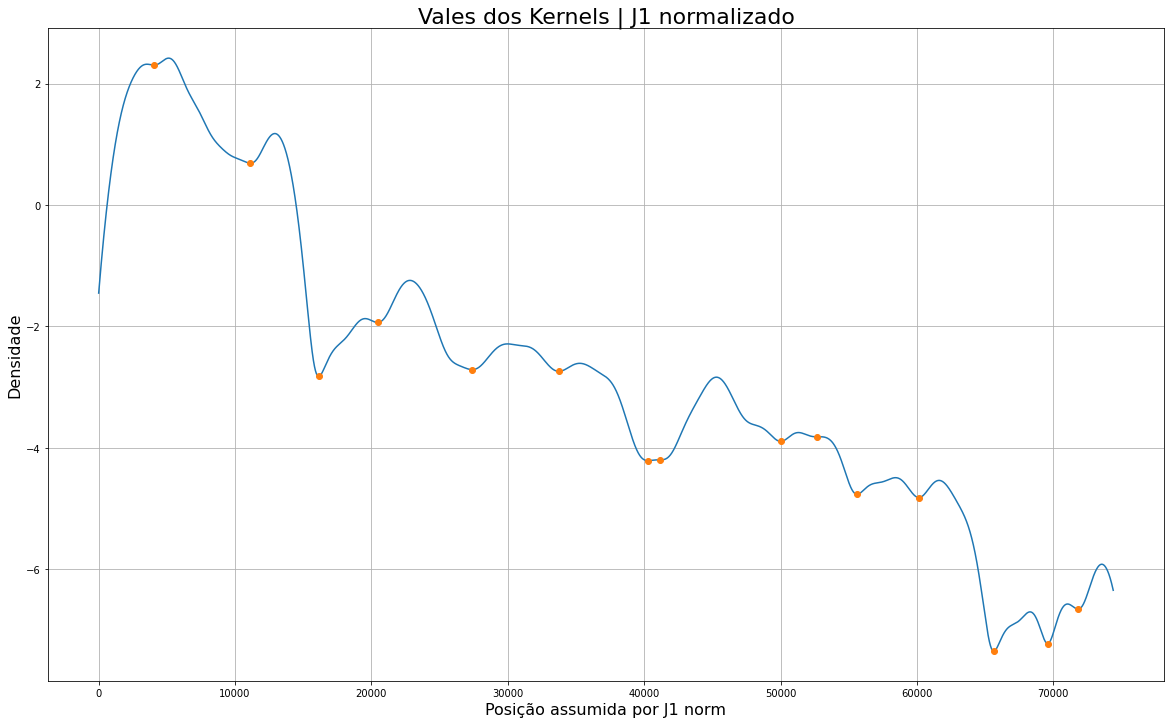

[ 4058 11130 16137 20450 27394 33747 40291 41156 50014 52655 55619 60146
 65641 69589 71816]


In [ ]:
from scipy.signal import argrelmin

x1 = log1
valleys1 = argrelmin(x1)[0] #Calcula a minima relativa dos dados

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J1 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J1 norm", fontsize=16)
plt.grid(True)
plt.plot(x1)
plt.plot(valleys1, x1[valleys1], "o")
plt.show()

print(valleys1)


In [ ]:
x1[valleys1]

array([ 2.30464619,  0.68779172, -2.82299307, -1.93575926, -2.71223744,
       -2.74055155, -4.21154881, -4.199164  , -3.89398122, -3.81869177,
       -4.7655125 , -4.81890028, -7.34970496, -7.22405464, -6.65785033])

In [ ]:
np.diff(x1[valleys1]) # encontramos os deltas dos peaks

array([-1.61685447, -3.51078479,  0.88723381, -0.77647818, -0.02831412,
       -1.47099725,  0.01238481,  0.30518278,  0.07528945, -0.94682073,
       -0.05338778, -2.53080468,  0.12565032,  0.56620432])

In [ ]:
np.argsort(np.diff(x1[valleys1])) #ordenamentos dos indices

array([ 1, 11,  0,  5,  9,  3, 10,  4,  6,  8, 12,  7, 13,  2],
      dtype=int64)

In [ ]:
ord1 = np.argsort(np.abs(np.diff(x1[valleys1]))) #menor para o maior

In [ ]:
np.abs(np.diff(x1[valleys1])) 
#Calcula o valor absoluto do elemento
#Calcula diferenças ao longo do eixo "diff"

array([1.61685447, 3.51078479, 0.88723381, 0.77647818, 0.02831412,
       1.47099725, 0.01238481, 0.30518278, 0.07528945, 0.94682073,
       0.05338778, 2.53080468, 0.12565032, 0.56620432])

In [ ]:
ordValleys_J1 = np.flip(ord)+1 #do maior para o menor - onde estão os vales mais profundo pro menos profundos

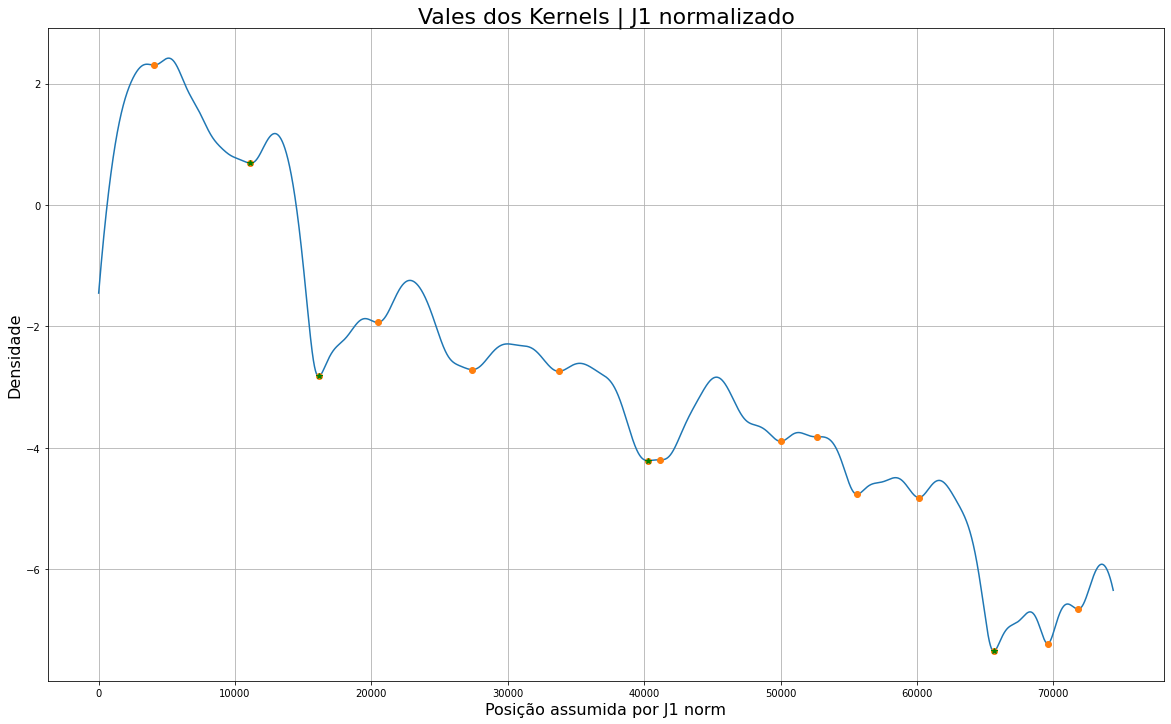

[ 4058 11130 16137 20450 27394 33747 40291 41156 50014 52655 55619 60146
 65641 69589 71816]


In [ ]:
#Vamos encontrar os pontos mais profundos onde ocorrerá a binização da amostra

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J1 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J1 norm", fontsize=16)
plt.grid(True)
plt.plot(x1)
plt.plot(valleys1, x1[valleys1], 'o')
plt.plot(valleys1[ordValleys_J1[0:4]], x1[valleys1[ordValleys_J1[0:4]]], '*', c='green')
plt.show()

print(valleys1)

Utilizamos a mesma tecnica usada para os outros J's

In [ ]:
for j in variaveis_df["J1_normalizado", "J2_normalizado"]:
    

In [ ]:
#Representa o tamanho do array
min_i = 0
max_i2 = variaveis_df["J2_normalizado"].shape[0]
max_i3 = variaveis_df["J3_normalizado"].shape[0]
max_i4 = variaveis_df["J4_normalizado"].shape[0]
max_i5 = variaveis_df["J5_normalizado"].shape[0]
max_i6 = variaveis_df["J6_normalizado"].shape[0]

#Variável auxiliar
aux2 = max_i2 - min_i
aux3 = max_i3 - min_i
aux4 = max_i4 - min_i
aux5 = max_i5 - min_i
aux6 = max_i6 - min_i

print("Numero de registros avaliados: ", aux2, aux3, aux4, aux5, aux6)

#Modela o array
J2 = variaveis_df["J2_normalizado"].values[::].reshape(-1, 1)
J3 = variaveis_df["J3_normalizado"].values[::].reshape(-1, 1)
J4 = variaveis_df["J4_normalizado"].values[::].reshape(-1, 1)
J5 = variaveis_df["J5_normalizado"].values[::].reshape(-1, 1)
J6 = variaveis_df["J6_normalizado"].values[::].reshape(-1, 1)

#aplica o KDE
kde_J2 = KernelDensity.fit(J2)
kde_J3 = KernelDensity.fit(J3)
kde_J4 = KernelDensity.fit(J4)
kde_J5 = KernelDensity.fit(J5)
kde_J6 = KernelDensity.fit(J6)

#Retorna números uniformimente espaçados em um intervalo especificado
s2 = np.linspace(0, 1.0, aux2)
s3 = np.linspace(0, 1.0, aux3)
s4 = np.linspace(0, 1.0, aux4)
s5 = np.linspace(0, 1.0, aux5)
s6 = np.linspace(0, 1.0, aux6)

#Calcule a probabilidade logarítmica de cada amostra sob o modelo
log2 = kde_J2.score_samples(s2.reshape(-1,1))
log3 = kde_J3.score_samples(s3.reshape(-1,1))
log4 = kde_J4.score_samples(s4.reshape(-1,1))
log5 = kde_J5.score_samples(s5.reshape(-1,1))
log6 = kde_J6.score_samples(s6.reshape(-1,1))

Numero de registros avaliados:  74400 74400 74400 74400 74400


In [ ]:
#Nova variável
x2 = log2
x3 = log3
x4 = log4
x5 = log5
x6 = log6

#Calcula a minima relativa dos dados
valleys2 = argrelmin(x2)[0]
valleys3 = argrelmin(x3)[0]
valleys4 = argrelmin(x4)[0]
valleys5 = argrelmin(x5)[0]
valleys6 = argrelmin(x6)[0]

#Retorna os indices que classificam o array
ord2 = np.argsort(np.abs(np.diff(x2[valleys2])))
ord3 = np.argsort(np.abs(np.diff(x3[valleys3])))
ord4 = np.argsort(np.abs(np.diff(x3[valleys4])))
ord5 = np.argsort(np.abs(np.diff(x3[valleys5])))
ord6 = np.argsort(np.abs(np.diff(x3[valleys6])))

#Inverte a ordem do array
ordValleys_J2 = np.flip(ord2)+1
ordValleys_J3 = np.flip(ord3)+1
ordValleys_J4 = np.flip(ord4)+1
ordValleys_J5 = np.flip(ord5)+1
ordValleys_J6 = np.flip(ord6)+1

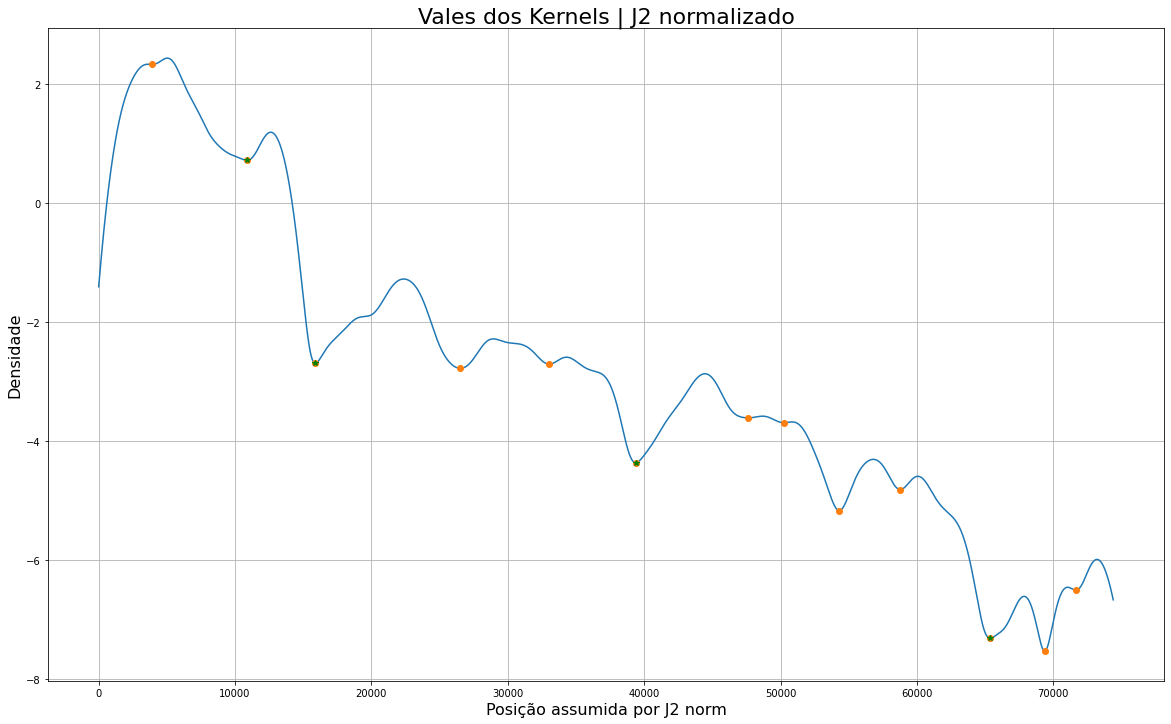

[ 3906 10867 15891 26522 33043 39383 47621 50249 54308 58783 65373 69372
 71659]


In [ ]:
#Referente ao J2

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J2 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J2 norm", fontsize=16)
plt.grid(True)
plt.plot(x2)
plt.plot(valleys2, x2[valleys2], 'o')
plt.plot(valleys2[ordValleys_J2[0:4]], x2[valleys2[ordValleys_J2[0:4]]], '*', c='green')
plt.show()

print(valleys2)

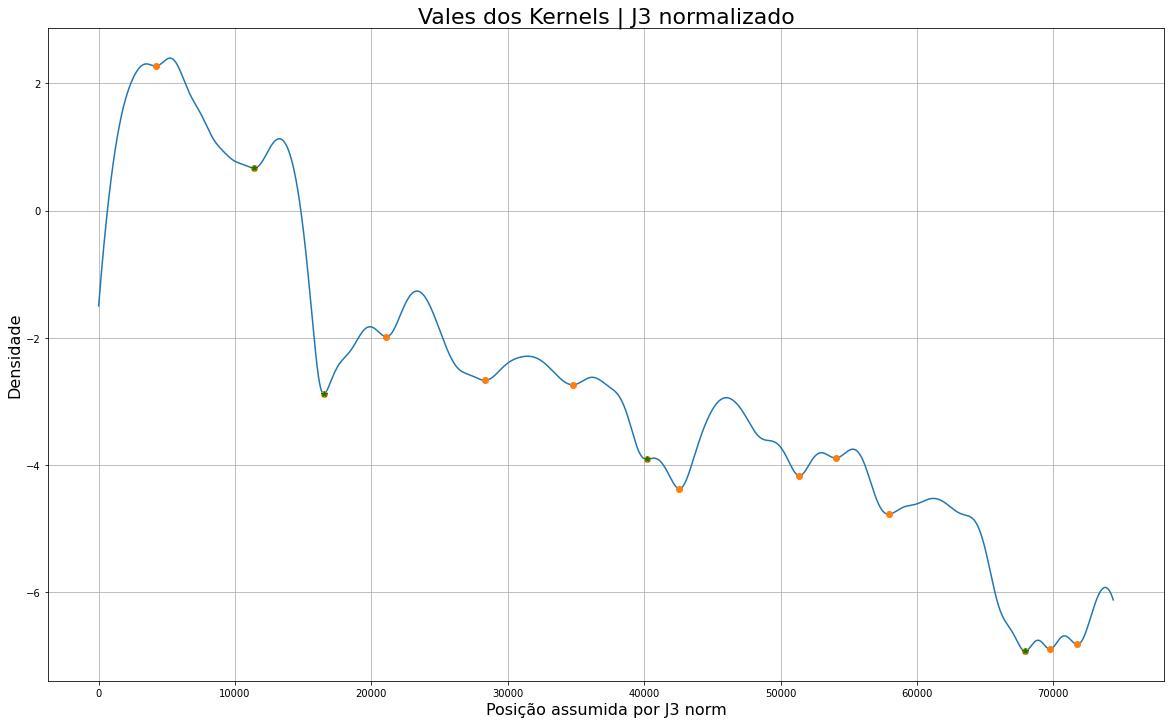

[ 4170 11374 16513 21095 28316 34760 40182 42585 51389 54040 57928 67937
 69759 71760]


In [ ]:
#Referente ao J3

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J3 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J3 norm", fontsize=16)
plt.grid(True)
plt.plot(x3)
plt.plot(valleys3, x3[valleys3], 'o')
plt.plot(valleys3[ordValleys_J3[0:4]], x3[valleys3[ordValleys_J3[0:4]]], '*', c='green')
plt.show()

print(valleys3)

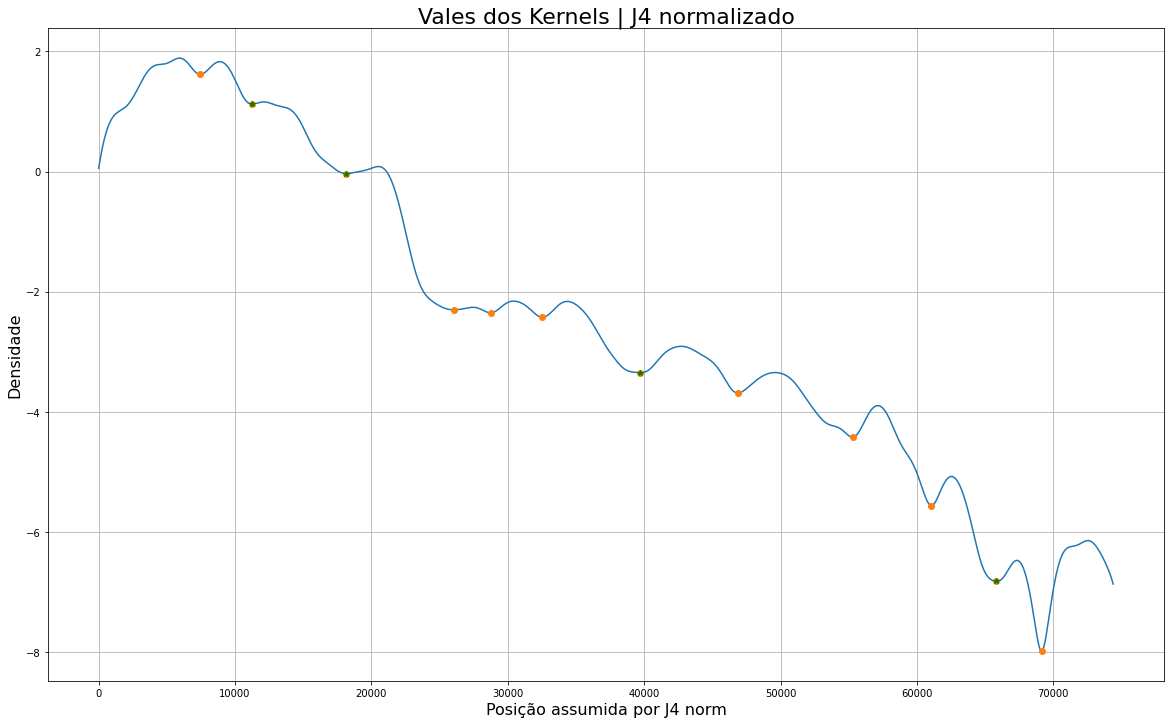

[ 7455 11263 18166 26043 28735 32543 39707 46874 55284 61070 65835 69144]


In [ ]:
#Referente ao J4

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J4 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J4 norm", fontsize=16)
plt.grid(True)
plt.plot(x4)
plt.plot(valleys4, x4[valleys4], 'o')
plt.plot(valleys4[ordValleys_J4[0:4]], x4[valleys4[ordValleys_J4[0:4]]], '*', c='green')
plt.show()

print(valleys4)

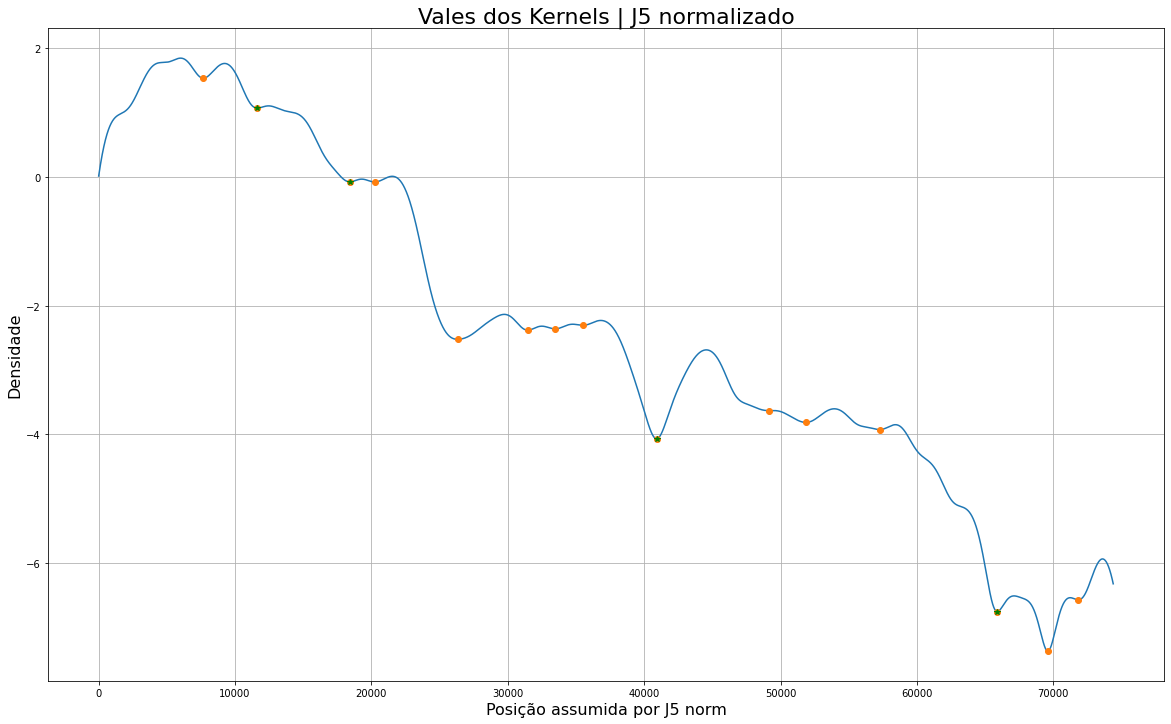

[ 7679 11641 18421 20243 26325 31468 33473 35505 40914 49151 51861 57266
 65901 69601 71839]


In [ ]:
#Referente ao J5

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J5 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J5 norm", fontsize=16)
plt.grid(True)
plt.plot(x5)
plt.plot(valleys5, x5[valleys5], 'o')
plt.plot(valleys5[ordValleys_J5[0:4]], x5[valleys5[ordValleys_J5[0:4]]], '*', c='green')
plt.show()

print(valleys5)

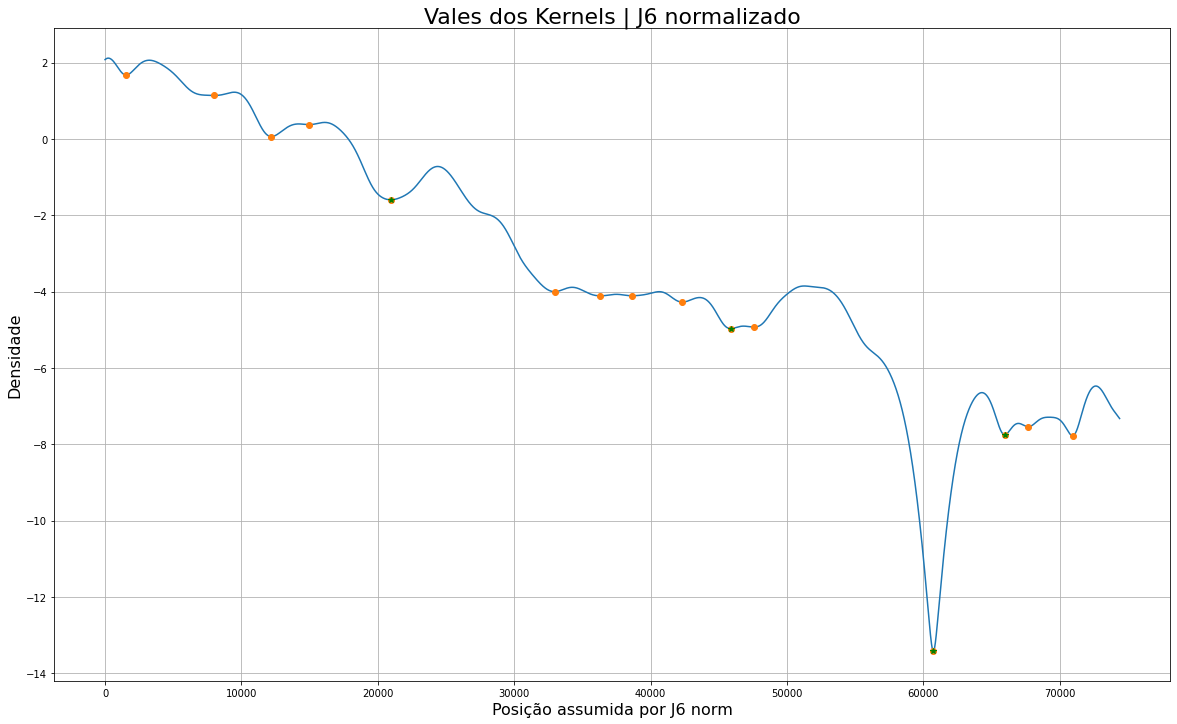

[ 1548  7993 12202 14958 20949 32963 36330 38670 42337 45879 47581 60741
 65977 67702 70948]


In [ ]:
#Referente ao J6

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J6 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J6 norm", fontsize=16)
plt.grid(True)
plt.plot(x6)
plt.plot(valleys6, x6[valleys6], 'o')
plt.plot(valleys6[ordValleys_J6[0:4]], x6[valleys6[ordValleys_J6[0:4]]], '*', c='green')
plt.show()

print(valleys6)

## 3 - Histograma | J1 normalizada default vs J1 normalizado com peak classes

<AxesSubplot:title={'center':'Histrograma J1 normalizado'}, xlabel='J1_normalizado', ylabel='Count'>

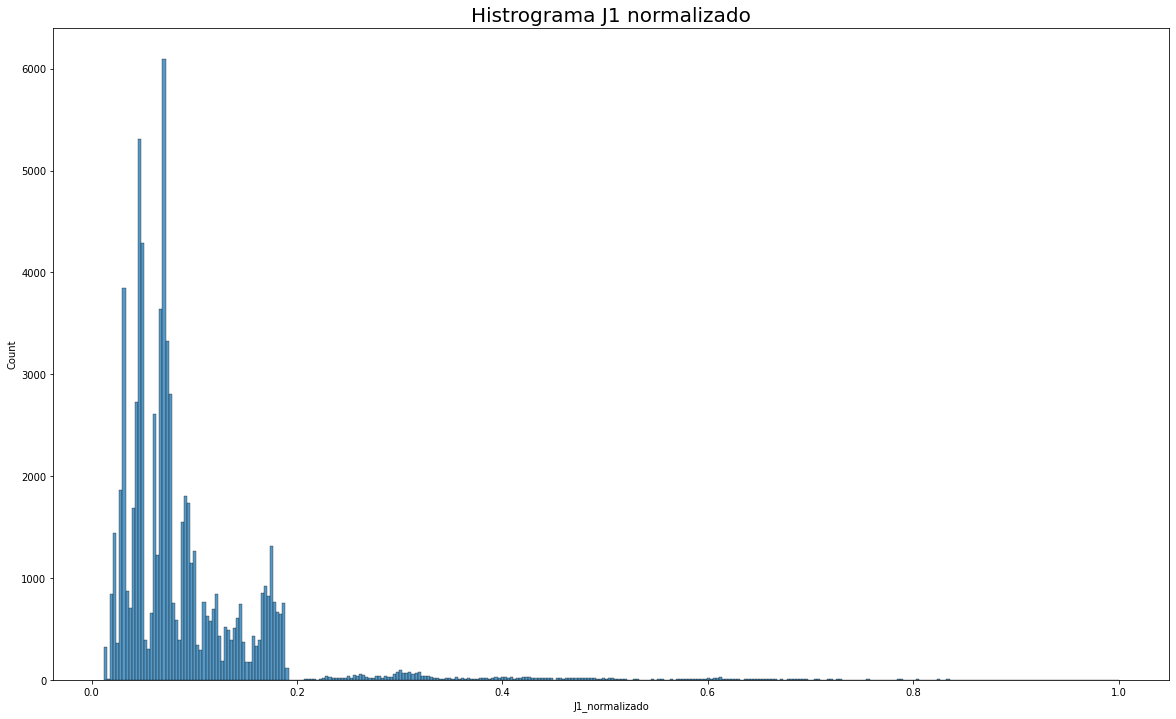

In [ ]:
plt.figure(figsize=(20, 12))
plt.title("Histrograma J1 normalizado", fontsize=20)
sns.histplot(variaveis_df["J1_normalizado"])

<AxesSubplot:title={'center':'Histrograma J1 normalizado com os picos de classe (17)'}, xlabel='J1 normalizado', ylabel='Count'>

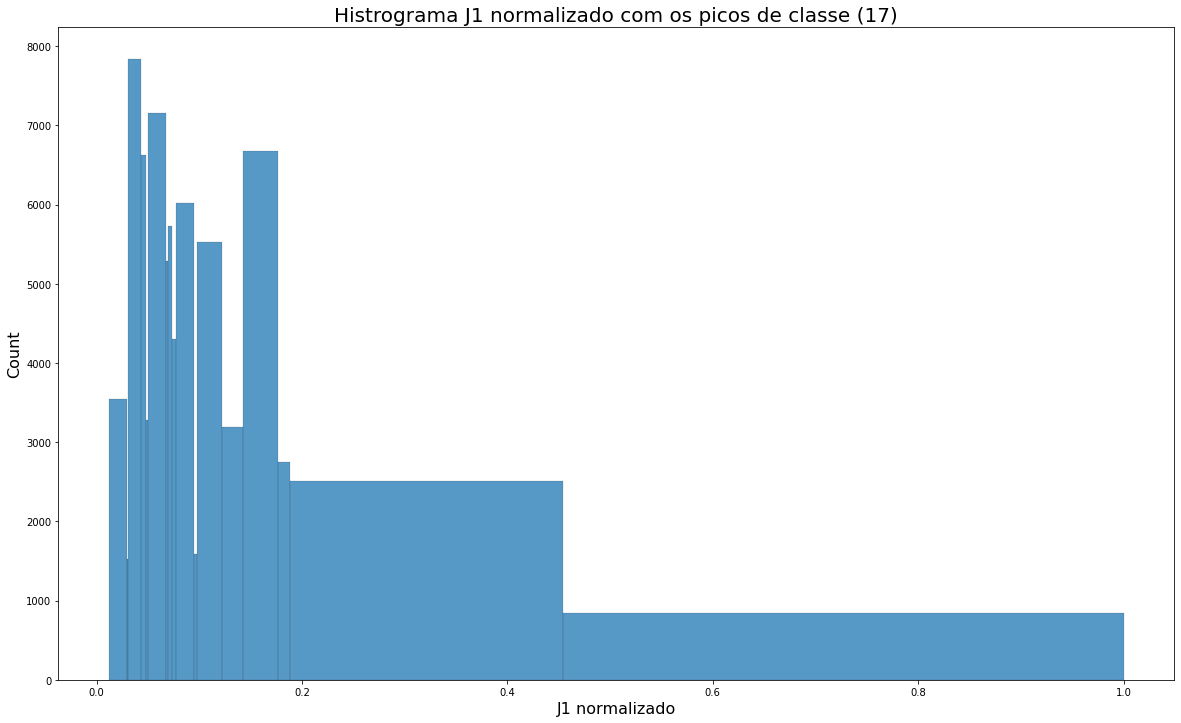

In [ ]:
fig, ax = plt.subplots(figsize =(20, 12))
plt.title(f"Histrograma J1 normalizado com os picos de classe ({len(classes) - 1})", fontsize=20)
plt.xlabel("J1 normalizado", fontsize=16)
plt.ylabel("Count", fontsize=16)
sns.histplot(variaveis_df["J1_normalizado"], bins = classes)

## 4 - testes

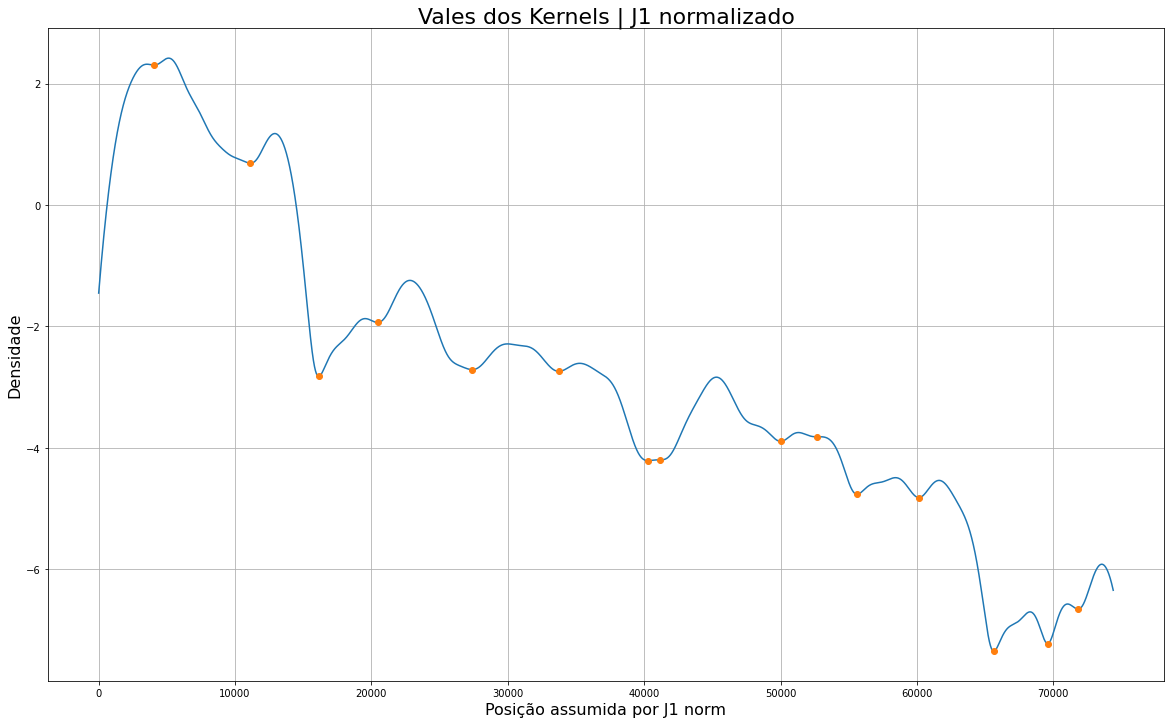

[ 4058 11130 16137 20450 27394 33747 40291 41156 50014 52655 55619 60146
 65641 69589 71816]


In [ ]:
from scipy.signal import argrelmin, argrelextrema
x = e
valleys = argrelmin(x)[0]
#peaks = argrelextrema(x, np.greater)[0]

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J1 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J1 norm", fontsize=16)
plt.grid(True)
plt.plot(x)
plt.plot(valleys, x[valleys], "o")
plt.show()

print(valleys)


In [ ]:
x[valleys]

array([ 2.30464619,  0.68779172, -2.82299307, -1.93575926, -2.71223744,
       -2.74055155, -4.21154881, -4.199164  , -3.89398122, -3.81869177,
       -4.7655125 , -4.81890028, -7.34970496, -7.22405464, -6.65785033])

In [ ]:
np.diff(x[valleys]) # encontramos os deltas dos peaks

array([-1.61685447, -3.51078479,  0.88723381, -0.77647818, -0.02831412,
       -1.47099725,  0.01238481,  0.30518278,  0.07528945, -0.94682073,
       -0.05338778, -2.53080468,  0.12565032,  0.56620432])

In [ ]:
np.argsort(np.diff(x[valleys])) #ordenamentos dos indices

array([ 1, 11,  0,  5,  9,  3, 10,  4,  6,  8, 12,  7, 13,  2],
      dtype=int64)

In [ ]:
ord = np.argsort(np.abs(np.diff(x[valleys]))) #menor para o maior

In [ ]:
np.abs(np.diff(x[valleys]))

array([1.61685447, 3.51078479, 0.88723381, 0.77647818, 0.02831412,
       1.47099725, 0.01238481, 0.30518278, 0.07528945, 0.94682073,
       0.05338778, 2.53080468, 0.12565032, 0.56620432])

In [ ]:
ordValleys = np.flip(ord)+1 #do maior para o menor - onde estão os vales mais profundo pro menos profundos

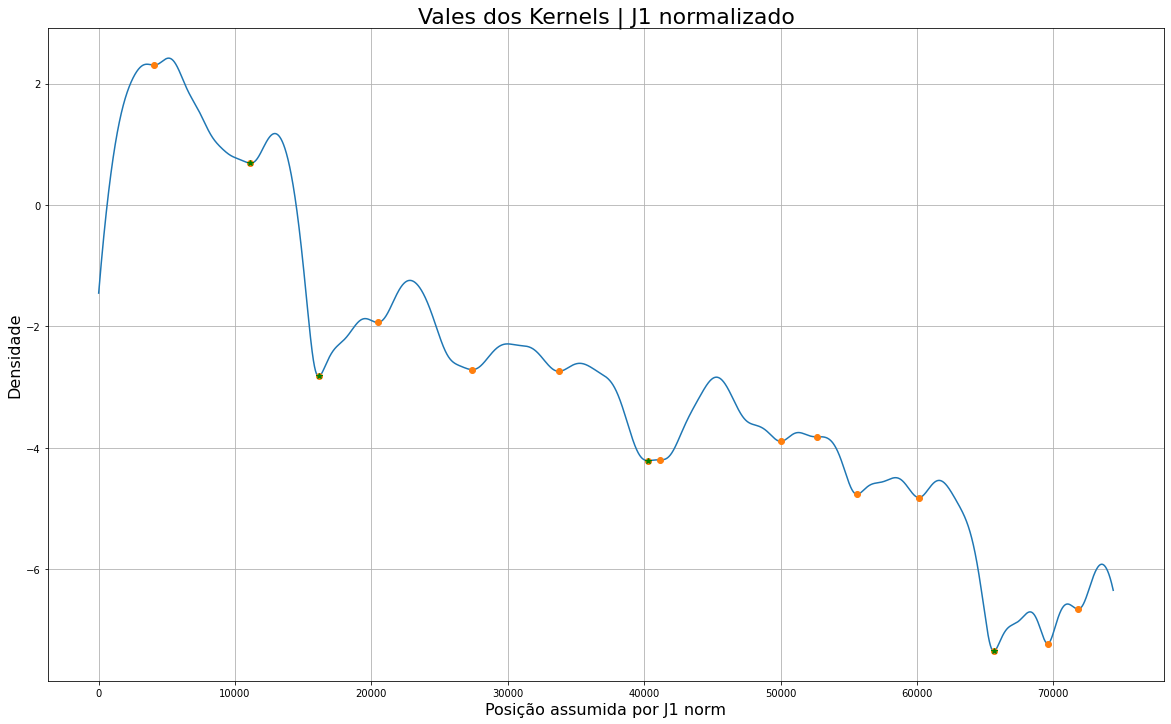

[ 4058 11130 16137 20450 27394 33747 40291 41156 50014 52655 55619 60146
 65641 69589 71816]


In [ ]:
#Vamos encontrar os pontos mais profundos onde ocorrerá a binização da amostra
x = e
valleys = argrelmin(x)[0]
#peaks = argrelextrema(x, np.greater)[0]

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J1 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J1 norm", fontsize=16)
plt.grid(True)
plt.plot(x)
plt.plot(valleys, x[valleys], 'o')
plt.plot(valleys[ordValleys[0:4]], x[valleys[ordValleys[0:4]]], '*', c='green')
plt.show()

print(valleys)

### 4.1 - Aplicando em outros J's normalizados

vamos aplicar o mesmo metodo aos outros j's

In [ ]:
#Utilizamos a mesma tecnica usada para o J1
min_i = 0
max_i2 = variaveis_df["J2_normalizado"].shape[0]
max_i3 = variaveis_df["J3_normalizado"].shape[0]
max_i4 = variaveis_df["J4_normalizado"].shape[0]
max_i5 = variaveis_df["J5_normalizado"].shape[0]
max_i6 = variaveis_df["J6_normalizado"].shape[0]

aux2 = max_i2 - min_i
aux3 = max_i3 - min_i
aux4 = max_i4 - min_i
aux5 = max_i5 - min_i
aux6 = max_i6 - min_i
print("Numero de registros avaliados: ", aux2, aux3, aux4, aux5, aux6)

J2 = variaveis_df["J2_normalizado"].values[::].reshape(-1, 1)
J3 = variaveis_df["J3_normalizado"].values[::].reshape(-1, 1)
J4 = variaveis_df["J4_normalizado"].values[::].reshape(-1, 1)
J5 = variaveis_df["J5_normalizado"].values[::].reshape(-1, 1)
J6 = variaveis_df["J6_normalizado"].values[::].reshape(-1, 1)

kde_J2 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(J2)
kde_J3 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(J3)
kde_J4 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(J4)
kde_J5 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(J5)
kde_J6 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(J6)


s2 = np.linspace(0, 1.0, aux2)
s3 = np.linspace(0, 1.0, aux3)
s4 = np.linspace(0, 1.0, aux4)
s5 = np.linspace(0, 1.0, aux5)
s6 = np.linspace(0, 1.0, aux6)

e2 = kde2.score_samples(s2.reshape(-1,1))
e3 = kde3.score_samples(s3.reshape(-1,1))
e4 = kde4.score_samples(s4.reshape(-1,1))
e5 = kde5.score_samples(s5.reshape(-1,1))
e6 = kde6.score_samples(s6.reshape(-1,1))

Numero de registros avaliados:  74400 74400 74400 74400 74400


In [ ]:
x2 = e2
x3 = e3
x4 = e4
x5 = e5
x6 = e6

valleys2 = argrelmin(x2)[0]
valleys3 = argrelmin(x3)[0]
valleys4 = argrelmin(x4)[0]
valleys5 = argrelmin(x5)[0]
valleys6 = argrelmin(x6)[0]

ord2 = np.argsort(np.abs(np.diff(x2[valleys2])))
ord3 = np.argsort(np.abs(np.diff(x3[valleys3])))
ord4 = np.argsort(np.abs(np.diff(x3[valleys4])))
ord5 = np.argsort(np.abs(np.diff(x3[valleys5])))
ord6 = np.argsort(np.abs(np.diff(x3[valleys6])))

ordValleys_J2 = np.flip(ord2)+1
ordValleys_J3 = np.flip(ord3)+1
ordValleys_J4 = np.flip(ord4)+1
ordValleys_J5 = np.flip(ord5)+1
ordValleys_J6 = np.flip(ord6)+1

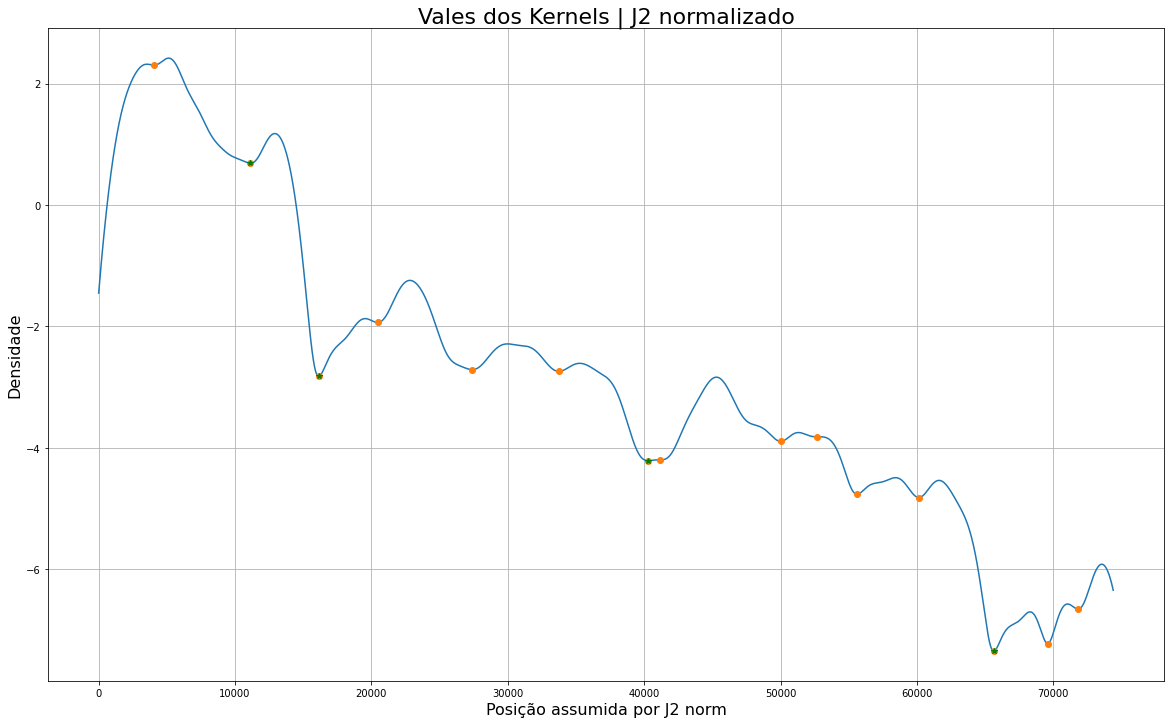

[ 4058 11130 16137 20450 27394 33747 40291 41156 50014 52655 55619 60146
 65641 69589 71816]


In [ ]:

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J2 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J2 norm", fontsize=16)
plt.grid(True)
plt.plot(x2)
plt.plot(valleys2, x2[valleys2], 'o')
plt.plot(valleys2[ordValleys_J2[0:4]], x2[valleys2[ordValleys_J2[0:4]]], '*', c='green')
plt.show()

print(valleys2)

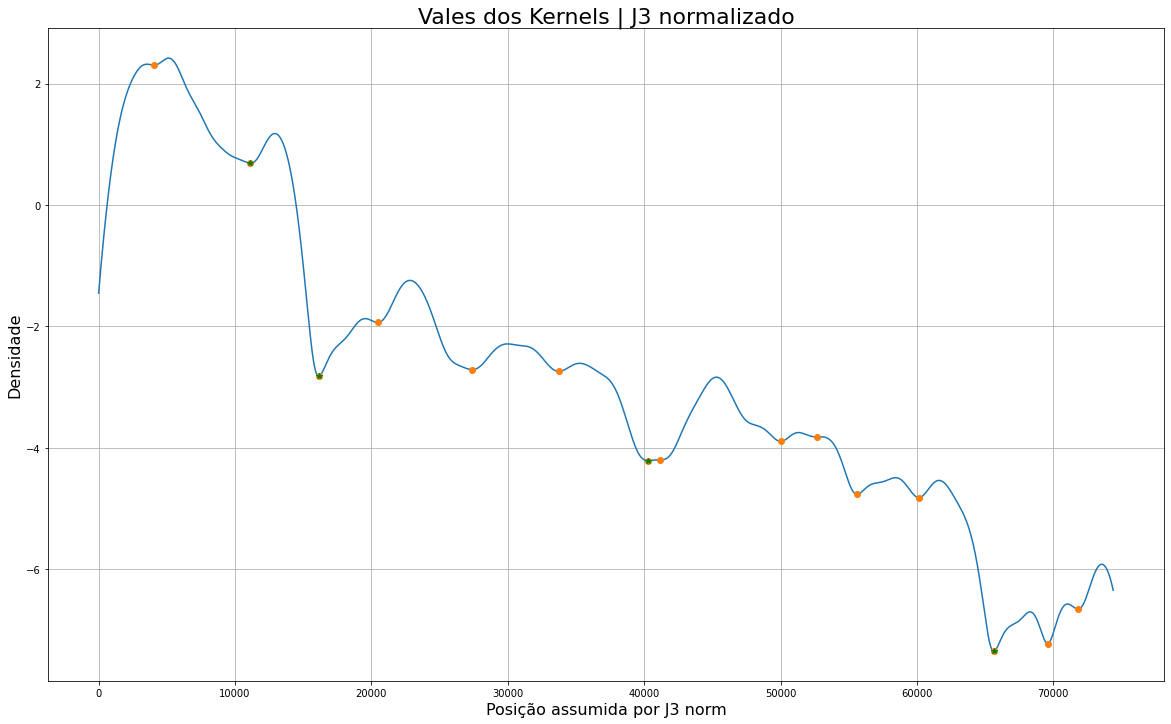

[ 4058 11130 16137 20450 27394 33747 40291 41156 50014 52655 55619 60146
 65641 69589 71816]


In [ ]:

plt.figure(figsize=(20, 12))
plt.title("Vales dos Kernels | J3 normalizado", fontsize=22)
plt.ylabel("Densidade", fontsize=16)
plt.xlabel("Posição assumida por J3 norm", fontsize=16)
plt.grid(True)
plt.plot(x3)
plt.plot(valleys3, x3[valleys3], 'o')
plt.plot(valleys3[ordValleys_J3[0:4]], x3[valleys3[ordValleys_J3[0:4]]], '*', c='green')
plt.show()

print(valleys3)